# Project 2: Supervised Learning
### Building a Student Intervention System
<sub>Uirá Caiado. April 13, 2016<sub>

#### Abstract

_There exists a push from educators and administrators to raise the likelihood of students successfully complete their programs. The aim of this project is to identify students who need intervention before they drop out of school. My goal is to use concepts from supervised machine learning to find the most effective model with the least amount of computation costs that identify such students._

## 1. Introduction

In this section, I will give some background about the problem addressed and the goal of the project. I also will identify which type of model that will be developed.

### 1.1. Some Background
As stated by [Udacity](https://www.udacity.com/course/viewer#!/c-nd009/l-5446988865/m-5446493941) in the description for this project, as education has grown to rely more and more on technology, more and more data is available for examination and prediction. Logs of student activities, grades, interactions with teachers and fellow students, and more are now captured through learning management systems.

Within all levels of education, there exists a surge to help increase the likelihood of student success without watering down the education or engaging in behaviors that raise the probability of passing metrics without improving the actual underlying learning. Graduation rates are often the criteria of choice for this, and educators and administrators are after new ways to predict success and failure early enough to stage effective interventions, as well as to identify the effectiveness of different interventions.

### 1.2. The Goal

The goal for this project is implementing a student intervention system using concepts from Supervised Machine Learning. I am going to choose and develop a model that will predict the likelihood that a given student will pass, thus helping diagnose whether or not an intervention is necessary.

I will suppose that the data available to create the model is a representative but a small sample of the dataset that I would have access in the production environmet. So, besides the typical accuracy requirements for any machine-learning project, I am also going to look for models that are efficient in the use of resources (computation time and memory). Thus, the model will be evaluated on three factors:

- Its [F1](https://en.wikipedia.org/wiki/F1_score) Score, summarizing the number of correct positives and correct negatives out of all posible cases. In other words, how well does the model differentiate likely passes from failures

- The size of the training set, preferring smaller training sets over larger ones. That is, how much data does the model need to make a reasonable prediction?

- The computation resources to make a reliable prediction. How much time and memory is required to correctly identify students that need intervention?

### 1.3 Classification vs Regression

```
Udacity:
Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?
```

The model that will be developed is a Classifier. According to \cite{Hastie_2009}, the distinction in the output type has led to a naming convention for prediction tasks: _regression_ when we predict quantitative (continuous) outputs, and _classification_ when we predict qualitative outputs (discrete). As the goal of this project is to identify if the student will succeed, the problem posed is a classification problem once it requires a binary answer (passed, failed).

## 2. Exploring the Data

In this section, we will explore the data to look for insides about the features.

### 2.1. Basic Facts

```
Udacity: Let's go ahead and read in the student dataset first. To execute a code cell, click inside it and press Shift+Enter.
```
Let's go ahead and execute a basic description of the student dataset:

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


```
Udacity:
Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features
Use the code block below to compute these values. Instructions/steps are marked using TODOs.
```

In [3]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = student_data.shape[0]
n_features = student_data.shape[1]
n_passed = sum((student_data.passed=="yes"))
n_failed = sum((student_data.passed=="no"))
grad_rate = (n_passed *1./(n_failed+n_passed))*100
print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 31
Graduation rate of the class: 67.09%


All the 31 features in the dataset are discrete and Qualitative. There are 14 binary data, 13 ordered categorical variables and other 4 Categorical features. Among them, there are variables such as Father's Job, Family Size, if the student wants to take higher education or if he/she is in a romantic relationship. The data offers a pretty comprehensive profile of student life. At this point, it 's hard to say what features are relevant or not. A complete description of each variable can be found on the Github [project page](https://github.com/udacity/machine-learning/tree/master/projects/student_intervention).

Due to the nature of the data, in "Preparing the Data" section, the features will be coded via [_dummy variables_](https://www.moresteam.com/whitepapers/download/dummy-variables.pdf). As described by \cite{Hastie_2009}, this method consists in representing a K-Level qualitative variable by a vector of K binary variables, where only one of which is "on" at a time. (I should check that) There is no missing data on this dataset and no presence of "real" outliers.

### 2.2. How the features are spread out

Before moving on, I am going to plot each feature to see how each inner classes of each variable are divided between the target labels "Passed" and "Not Passed." Below is plotted the Categorical features of the dataset. Here is possible to see that when the guardian is not the mother nor the father, it is more likely that the pupil not pass. Also, when the mother's occupation is teaching (_Fjob_), is likely that the student to pass.

In [5]:
import plot_features; reload(plot_features);

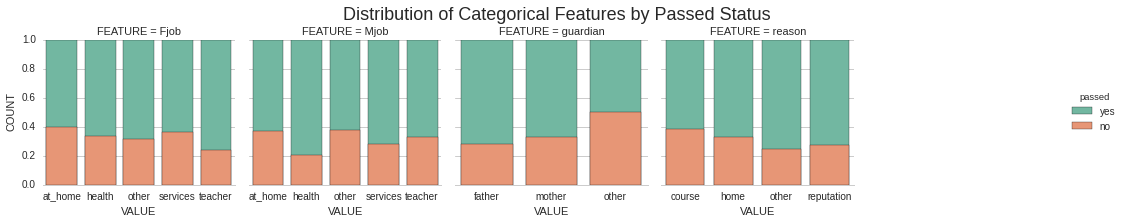

In [45]:
g = plot_features.bar_chart(student_data, i_plotGroup=1);

Looking at the Ordered Categorical Features, where there is an ordering of the values, the features _absences_, _age_ and _failure_ stand out. The _failures_ feature is the number of past class failures (n if 1<=n<3, else 4) and absences is the number of school absences. In all these variables, the bigger the number, the higher the likelihood of the student does not pass.

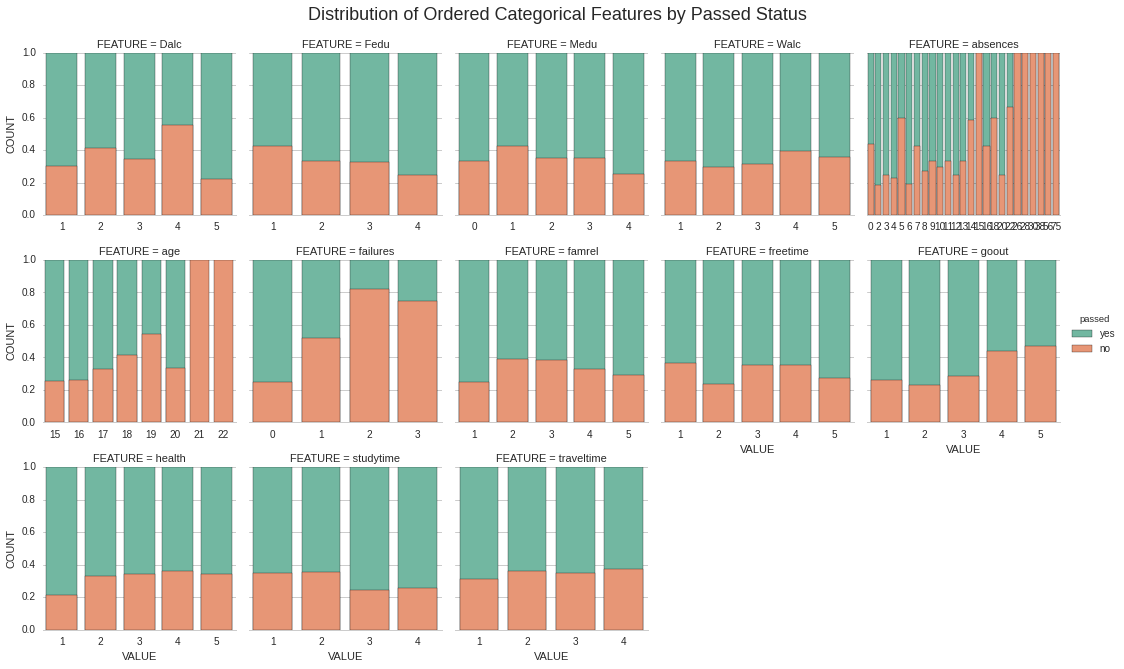

In [46]:
g = plot_features.bar_chart(student_data, i_plotGroup=2);

Finally, looking at the Binary Data, what more draw the attention are the features _higher_ and _schoolsup_. The feature _higher_ is if the student wants to take higher education and _schoolsup_ is if the student has extra educational support. Some features, as _activities_ and _nursery_, presented a very similar distribution between the classes

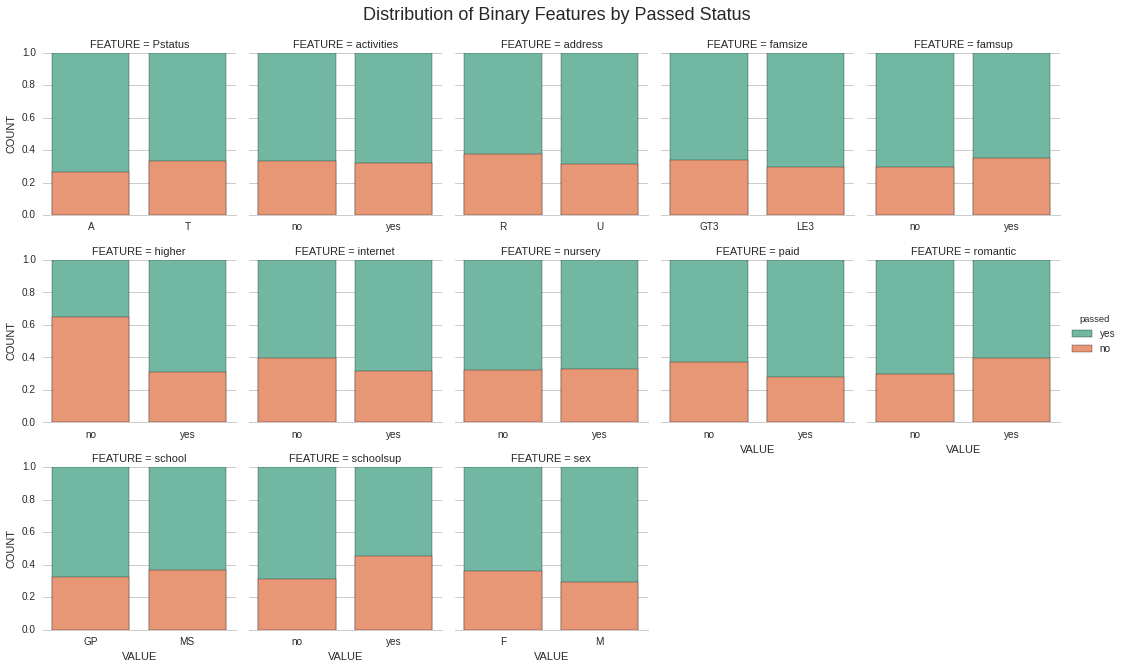

In [47]:
g = plot_features.bar_chart(student_data, i_plotGroup=3);

As can be seen, there are a lot of features that might add up to the classification process, although some features may be not so relevant It is important to notice that the model developed with this amount of data (365 data points) and variables (31) can suffer from the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). Many of the features will be converted into dummy variables, what could increase the amount of data needed to build an accurate model. Maybe would be interesting to test if treat the binary data as numerical to reduce the necessity to split into dummies (reducing the dimension of the dataset) can increase the performance. It will be made in section 5.

## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### 3.1. Identify feature and target columns
```
Udacity:
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.
```
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

In [6]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
# columns names
i = 0
s_rtn = ''
print "Feature column(s):\n==================="
for s in feature_cols:
    if i%5==0:
        s_rtn += "\n"
        s_rtn += "{:15s}".format(s)
    else:
        s_rtn += "\t{:15s}".format(s)
    i += 1
print s_rtn
print "\nTarget column:\n===================\n{}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print "\nFeature values:\n==================="
print X_all.head()  # print the first 5 rows

Feature column(s):

school         	sex            	age            	address        	famsize        
Pstatus        	Medu           	Fedu           	Mjob           	Fjob           
reason         	guardian       	traveltime     	studytime      	failures       
schoolsup      	famsup         	paid           	activities     	nursery        
higher         	internet       	romantic       	famrel         	freetime       
goout          	Dalc           	Walc           	health         	absences       

Target column:
passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   

### 3.2. Preprocess feature columns
```
Udacity:
As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the `pandas.get_dummies()`(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.
```

In [6]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):\n===================".format(len(X_all.columns))
s_rtn = ""
i = 0
for s in list(X_all.columns):
    if i%3==0:
        s_rtn += "\n"
        s_rtn += "{:18s}".format(s)
    else:
        s_rtn += "\t{:18s}".format(s)
    i += 1
print s_rtn

Processed feature columns (48):

school_GP         	school_MS         	sex_F             
sex_M             	age               	address_R         
address_U         	famsize_GT3       	famsize_LE3       
Pstatus_A         	Pstatus_T         	Medu              
Fedu              	Mjob_at_home      	Mjob_health       
Mjob_other        	Mjob_services     	Mjob_teacher      
Fjob_at_home      	Fjob_health       	Fjob_other        
Fjob_services     	Fjob_teacher      	reason_course     
reason_home       	reason_other      	reason_reputation 
guardian_father   	guardian_mother   	guardian_other    
traveltime        	studytime         	failures          
schoolsup         	famsup            	paid              
activities        	nursery           	higher            
internet          	romantic          	famrel            
freetime          	goout             	Dalc              
Walc              	health            	absences          


TODO: Talk and implement the code to not treat the binary data as dummy variable

### 3.3. Split data into training and test sets
```
Udacity:
So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.
```

In [8]:
# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ 
    Shuffles and splits data into 75% training and 25% testing subsets,
    then returns the training and testing subsets.
    """
    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                        random_state=0)
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


X_train ,y_train, X_test, y_test = shuffle_split_data(X_all, y_all)
print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Training set: 296 samples
Test set: 99 samples


TODO: Split the X2 either

## 4. Training and Evaluating Models
```
Udacity:
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F1 score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F1 score on training set and F1 score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.
```

TODO:

- start by exploring the computation resource (by charting). I could test all with default configurations and them explain that maybe I should test to the model complexity either (but I shouldn't implement that). I can talk about the notion of [soft computing](https://www.quora.com/What-are-the-running-times-of-various-machine-learning-algorithms-like-SVM-neural-networks-etc-in-terms-of-big-O-notation) here. Maybe I should start by guessing the outcomes and briefing why of my guessings.

- After that, I could select this three models and give a brief of each one. Answer the 1) and 2) here

- Then, I could evaluate the learning curve to decide about the total amount of data required and the F1 score. I should use the same ylim to all charts
- finaly, I can produce those 3 tables

TODO: Remember that I assumed that the production dataset would be much bigger than that. So, I could eclude some algo but I will test them anyway

In [100]:
# Train a model
import time
from memory_profiler import memory_usage

def train_classifier(clf, X_train, y_train, shouldPrint=True):
    if shouldPrint:
        print "Training {}...".format(clf.__class__.__name__)
    start = time.time()

    f_memUsage = memory_usage((clf.fit,
                              (X_train, y_train)),
                              max_usage=True)
    
    
    end = time.time()
    if shouldPrint:
        s_print = "Done!\nTraining time (secs): {:.3f}\nPeak memory: {:.2f} MiB"
        print s_print.format(end - start, f_memUsage[0])
    return end - start, f_memUsage[0]

# TODO: Choose a model, import it and instantiate an object
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Fit model to training data
f_time, f_memory = train_classifier(clf, X_train, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

Training GaussianNB...
Done!
Training time (secs): 0.076
Peak memory: 123.81 MiB


In [113]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target, shouldPrint=True):
    """
    ...
    """
    def predict_aux(clf, d_rtn):
        d_rtn["rtn"] = clf.predict(features)
    d_rtn = {"rtn": []}
    s_rtn = "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    
    f_memUsage = memory_usage((predict_aux,
                              (clf, d_rtn)),
                              max_usage=True)
    
    y_pred = d_rtn["rtn"]
    end = time.time()
    f_time = end - start
    s_aux = "\nDone!\nPrediction time (secs): {:.3f}\nPeak memory: {:.2f} MiB"
    s_rtn += s_aux.format(f_time, f_memUsage[0])
    f_rtn = f1_score(target.values, y_pred, pos_label='yes')
    if shouldPrint:
        print s_rtn
    return f_rtn, f_time, f_memUsage

train_f1_score, f_time, f_memUsage = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.094
Peak memory: 102.89 MiB
F1 score for training set: 0.813627254509


In [115]:
# Predict on test data
train_f1_score, f_time, f_memUsage = predict_labels(clf, X_test, y_test)
print "F1 score for test set: {}".format(train_f1_score)

Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.069
Peak memory: 102.91 MiB
F1 score for test set: 0.770186335404


In [112]:
# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    """
    ...
    """
    s_rtn = "------------------------------------------"
    s_rtn += "Training set size: {}".format(len(X_train))
    train_classifier(clf, X_train, y_train, shouldPrint=False)
    t_rtnTrain = predict_labels(clf, X_train, y_train, rtnTxt=False)
    s_rtn += "F1 score for training set: {}".format(t_rtnTrain[0])
    t_rtnTest = predict_labels(clf, X_test, y_test, rtnTxt=False)
    s_rtn += "F1 score for test set: {}".format(t_rtnTest[0])
    return t_rtnTrain, t_rtnTest, s_rtn

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant


# We will vary the training set size so that we have 50 different sizes
sizes = np.round(np.linspace(1, len(X_train), 50))
train_f1 = np.zeros(len(sizes))
train_time = np.zeros(len(sizes))
train_mem = np.zeros(len(sizes))

test_f1 = np.zeros(len(sizes))
test_time = np.zeros(len(sizes))
test_men = np.zeros(len(sizes))



for i, s in enumerate(sizes):
    s = int(s)
    # Setup a decision tree regressor so that it learns a tree with max_depth = depth
    t_rtnTrain, t_rtnTest, s_rtn = train_predict(clf, X_train[:s], y_train[:s],
                                                 X_test, y_test)
    # Find the performance on the training set
    train_f1[i] = t_rtnTrain[0]
    train_time[i] = t_rtnTrain[1]
    train_mem[i] = t_rtnTrain[2]

    # Find the performance on the testing set
    test_f1[i] = t_rtnTest[0]
    test_time[i] = t_rtnTest[1]
    test_men[i] = t_rtnTest[2]


print "Done!"

IndexError: tuple index out of range

In [26]:
import matplotlib.pyplot as pl

In [4]:
# Put this code inside .py file
# Create the figure window
fig = pl.figure(figsize=(8,6))

# Subplot the learning curve graph
ax = fig.add_subplot(2, 1, 1)
ax.plot(sizes, test_err, lw = 2, label = 'Testing Score')
ax.plot(sizes, train_err, lw = 2, label = 'Training Score')
ax.legend()
ax.set_title('Learning Performances')
# ax.set_xlabel('Number of Data Points in Training Set')
ax.set_ylabel('F1 Score')
ax.set_xlim([0, len(X_train)])


ax = fig.add_subplot(2, 1, 2)
ax.plot(sizes, test_time * 10**3, lw = 2, label = 'Testing Time')
ax.plot(sizes, train_time * 10**3, lw = 2, label = 'Training Time')
ax.legend()
ax.set_title('Learning Time')
ax.set_xlabel('Number of Data Points in Training Set')
ax.set_ylabel('Total Time ( $10^3$)')
ax.set_xlim([0, len(X_train)])
fig.tight_layout()


# Visual aesthetics
fig.suptitle('Gaussian Naive Bayes Classifier Performance', fontsize=18, y=1.03)
fig.tight_layout()

# pl.savefig('nb_learning_curve.eps', format='eps', dpi=1000)

NameError: name 'pl' is not defined

In [ ]:
# TODO: Train and predict using two other models

## 5. Choosing the Best Model

```
Udacity:
- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F1 score?
```

In [ ]:
# TODO: Fine-tune your model and report the best F1 score

TODO: Test the reduces dataset here, just with the model choosed

## Reflection

_Style notebook and change matplotlib defaults_

In [4]:
#loading style sheet
from IPython.core.display import HTML
HTML( open('ipython_style.css').read())

In [2]:
#changing matplotlib defaults
%matplotlib inline
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2", 10))

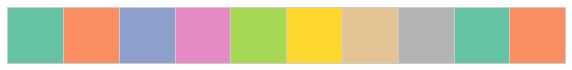

In [17]:
sns.palplot(sns.color_palette("Set2", 10))